In [1]:
import pandas as pd

df = pd.read_csv(r"C:\Users\gurra\car_price\archive (2)\CarPrice_Assignment.csv")
df.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [2]:
df.columns


Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [3]:
X = df[['enginesize']]
y = df['price']


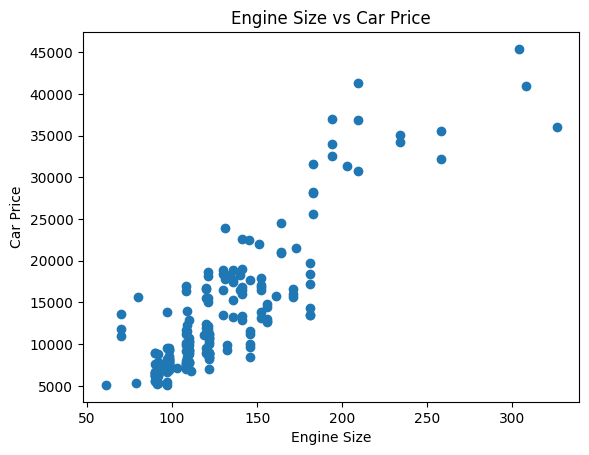

In [4]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(X, y)
plt.xlabel("Engine Size")
plt.ylabel("Car Price")
plt.title("Engine Size vs Car Price")
plt.show()


In [10]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X, y)


LinearRegression()

In [6]:
linear_pred_200 = linear_model.predict([[200]])
linear_pred_200


c:\Users\gurra\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([25534.23774749])

In [20]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)

poly_model = LinearRegression()
poly_model.fit(X_poly, y)


LinearRegression()

In [21]:
poly_pred_200 = poly_model.predict(poly.transform([[200]]))
poly_pred_200


c:\Users\gurra\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([28205.13190985])

c:\Users\gurra\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\gurra\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


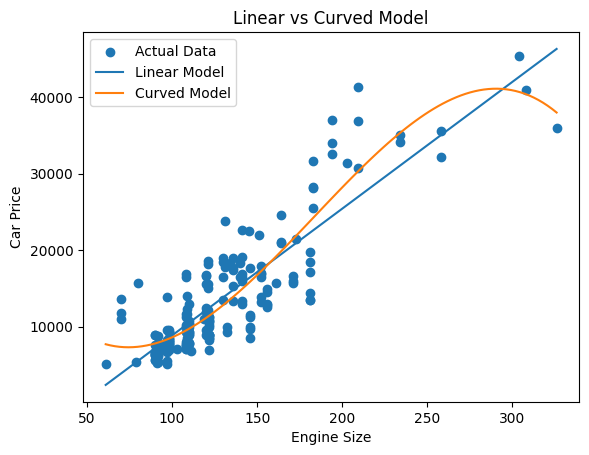

In [23]:
import numpy as np

X_range = np.linspace(X.min(), X.max(), 100).reshape(-1,1)

# Predictions
y_linear = linear_model.predict(X_range)
y_poly = poly_model.predict(poly.transform(X_range))

plt.figure()
plt.scatter(X, y, label="Actual Data")
plt.plot(X_range, y_linear, label="Linear Model")
plt.plot(X_range, y_poly, label="Curved Model")
plt.xlabel("Engine Size")
plt.ylabel("Car Price")
plt.title("Linear vs Curved Model")
plt.legend()
plt.show()


In [11]:
from sklearn.metrics import (
    root_mean_squared_error,
    mean_squared_error,
    mean_absolute_error,
    r2_score
)


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


In [13]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred_linear = linear_model.predict(X_test)


In [17]:
poly = PolynomialFeatures(degree=4)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

y_pred_poly = poly_model.predict(X_test_poly)


In [18]:
print("Linear Regression Metrics")
print("MAE :", mean_absolute_error(y_test, y_pred_linear))
print("MSE :", mean_squared_error(y_test, y_pred_linear))
print("RMSE:", root_mean_squared_error(y_test, y_pred_linear))
print("R²  :", r2_score(y_test, y_pred_linear))


Linear Regression Metrics
MAE : 2748.6947032901094
MSE : 15465458.96590847
RMSE: 3932.614774664367
R²  : 0.8040958796678975


In [19]:
print("Polynomial Regression Metrics")
print("MAE :", mean_absolute_error(y_test, y_pred_poly))
print("MSE :", mean_squared_error(y_test, y_pred_poly))
print("RMSE:", root_mean_squared_error(y_test, y_pred_poly))
print("R²  :", r2_score(y_test, y_pred_poly))


Polynomial Regression Metrics
MAE : 2356.697331997877
MSE : 11649790.194971029
RMSE: 3413.178898764468
R²  : 0.8524297335610764


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
#Example dataset: Study Hours vs. Pass/Fail (Binary Classification)
X=np.array([[1],[2],[3],[4],[5],[6],[7],[8],[9],[10]]) #Study Hours
y=np.array([0,0,0,0,1,1,1,1,1,1]) #0=Fail, 1=Pass

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [27]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [28]:
y_pred=model.predict(X_test)
print("Predictions:",y_pred)

Predictions: [1 0]


In [29]:
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


In [ ]:
#Classification Report
print("\nClassification Report:\n",classification_report(y_test,y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



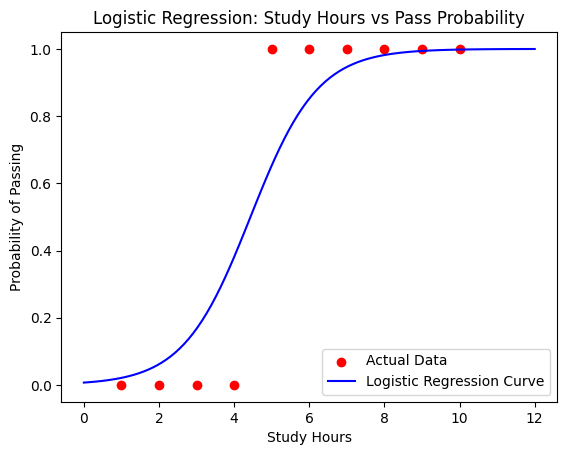

In [32]:
#Generate values for plotting
X_range=np.linspace(0, 12, 100).reshape(-1, 1)
y_prob= model.predict_proba(X_range)[:,1]

plt.scatter(X,y,color="red",label="Actual Data")
plt.plot(X_range,y_prob,color="blue",label="Logistic Regression Curve")
plt.xlabel("Study Hours")
plt.ylabel("Probability of Passing")
plt.title("Logistic Regression: Study Hours vs Pass Probability")
plt.legend()
plt.show()

In [33]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print("Confusion matrix:\n", cm)

Confusion matrix:
 [[1 0]
 [0 1]]


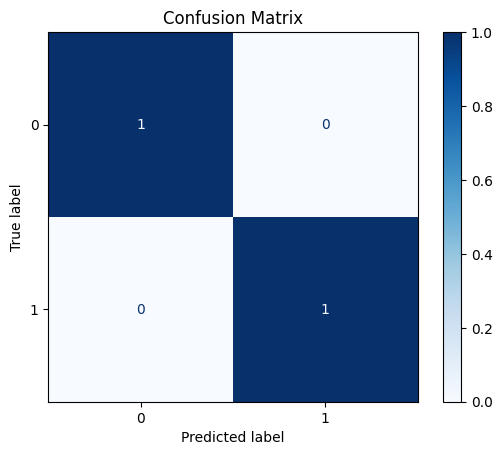

In [34]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    cmap="Blues",
    values_format="d"
)

plt.title("Confusion Matrix")
plt.show()

In [35]:
import pandas as pd

df = pd.read_csv(r"C:\Users\gurra\car_price\heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [36]:
from sklearn.preprocessing import StandardScaler
X=df.drop("target",axis=1)
y=df["target"]
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=42)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [38]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [39]:
y_pred=model.predict(X_test)
print("Predictions:",y_pred)

Predictions: [1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1
 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1
 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1
 1 1 0 1 1 1 1 1 0 0 1 0 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1
 1 0 1 0 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 0]


In [40]:
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.80


In [41]:
#Classification Report
print("\nClassification Report:\n",classification_report(y_test,y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



In [42]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print("Confusion matrix:\n", cm)

Confusion matrix:
 [[73 29]
 [13 90]]


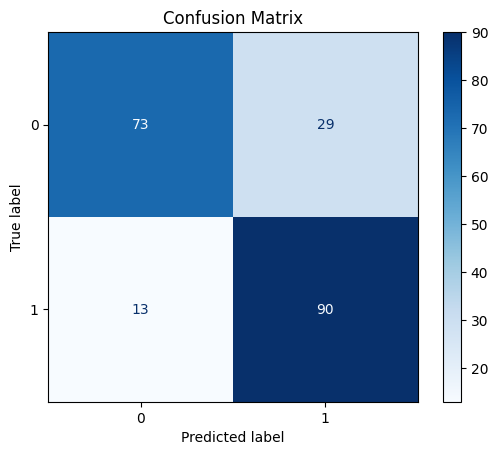

In [43]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    cmap="Blues",
    values_format="d"
)

plt.title("Confusion Matrix")
plt.show()

In [81]:
import pandas as pd

df = pd.read_csv(r"C:\Users\gurra\car_price\archive2\WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [82]:
X = df.drop(["Churn", "customerID"], axis=1)
y = df["Churn"].map({"Yes": 1, "No": 0})


In [83]:
X = pd.get_dummies(X, drop_first=True)


In [84]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.7842441447835344
[[915 121]
 [183 190]]


In [77]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]


In [78]:
new_customer = X.iloc[[0]]          # example
new_customer_scaled = scaler.transform(new_customer)

prediction = model.predict(new_customer_scaled)
probability = model.predict_proba(new_customer_scaled)

print("Churn Prediction:", prediction[0])
print("Churn Probability:", probability[0][1])


Churn Prediction: 0
Churn Probability: 0.0005859824986358565


In [79]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7842441447835344
[[915 121]
 [183 190]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1036
           1       0.61      0.51      0.56       373

    accuracy                           0.78      1409
   macro avg       0.72      0.70      0.71      1409
weighted avg       0.77      0.78      0.78      1409



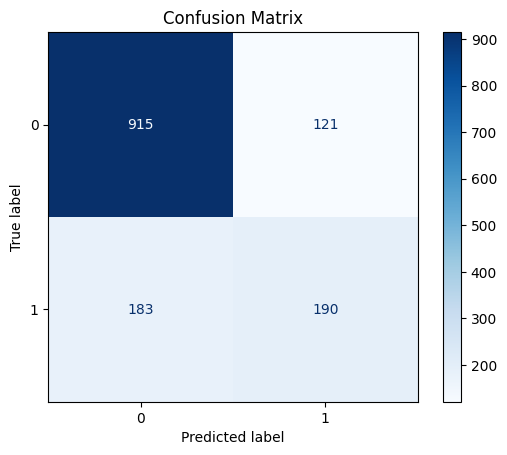

In [80]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    cmap="Blues",
    values_format="d"
)

plt.title("Confusion Matrix")
plt.show()